In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [209]:
stadiums = pd.read_csv('./Data Files/Stadium City and Capacity.csv')
attendance = pd.read_csv('./Data Files/Clean Attendance Payroll and Year.csv')

In [210]:
stadiums = stadiums.rename(columns = {'Team Code':'Tm'})
combined = stadiums.merge(attendance, on = 'Tm')

combined.head()

,Tm,Stadium,Capacity,City,Team,Unnamed: 0,Attendance,Attend/G,Est. Payroll,year
0,ARI,Chase Field,"48,686","Pheonix, AZ",Arizona Diamondbacks,0,2091685,25823,$59984226,2006
1,ARI,Chase Field,"48,686","Pheonix, AZ",Arizona Diamondbacks,30,2325249,28707,$52067546,2007
2,ARI,Chase Field,"48,686","Pheonix, AZ",Arizona Diamondbacks,60,2509924,30987,$66202712,2008
3,ARI,Chase Field,"48,686","Pheonix, AZ",Arizona Diamondbacks,90,2128765,26281,$75920666,2009
4,ARI,Chase Field,"48,686","Pheonix, AZ",Arizona Diamondbacks,120,2056697,25391,$61368166,2010


In [211]:
attendance = []
payroll = []

attendance.append(combined['Attend/G'])
payroll.append(combined['Est. Payroll'])
    
payroll = combined['Est. Payroll'].str[1:]

payroll = pd.to_numeric(payroll)
attendance = pd.to_numeric(attendance[0])

In [236]:
print(payroll.head())
print(attendance.head())

correlation = payroll.corr(attendance)

0    59984226
1    52067546
2    66202712
3    75920666
4    61368166
Name: Est. Payroll, dtype: int64
0    25823
1    28707
2    30987
3    26281
4    25391
Name: Attend/G, dtype: int64


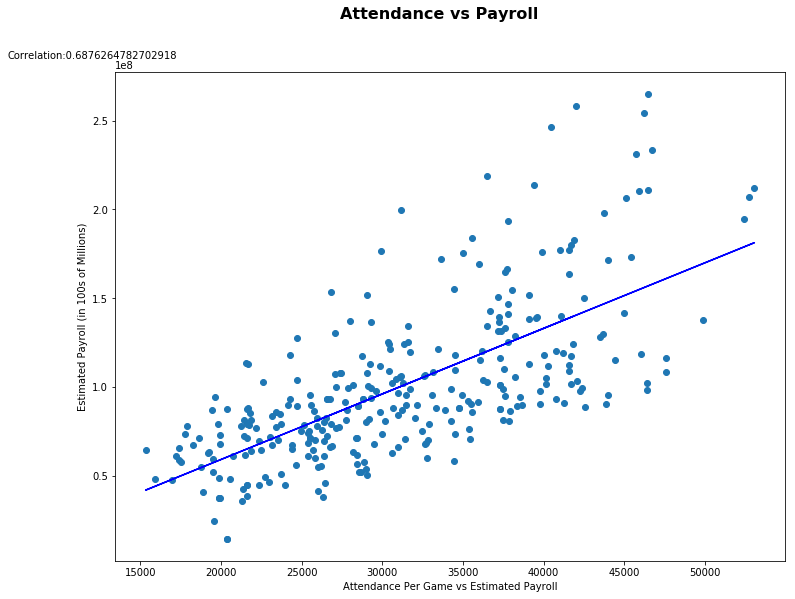

In [325]:
# Plot data

(slope, intercept, _, _, _) = linregress(attendance, payroll)
fit = slope * attendance + intercept

fig, ax = plt.subplots()

fig.suptitle("Attendance vs Payroll", fontsize=16, fontweight="bold")

ax.set_xlabel('Attendance Per Game vs Estimated Payroll')
ax.set_ylabel('Estimated Payroll (in 100s of Millions)')

ax.plot(attendance, payroll, linewidth=0, marker='o')

ax.plot(attendance, fit, 'b')

plt.figtext(,.9,(f"Correlation:{correlation}"))
plt.savefig('Data')
